<a href="https://colab.research.google.com/github/jdy5294/All_Deep_Learning/blob/main/Code/CH20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20장 전이 학습을 통해 딥러닝의 성능 극대화하기

## 1. 소규모 데이터셋으로 만드는 강력한 학습 모델

### 실습: 치매 환자의 뇌인지 일반인의 뇌인지 예측하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

!git clone https://github.com/taehojo/data-ch20.git

Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 10.47 MiB/s, done.


In [2]:
# 데이터 부풀리기: train set에만 적용
train_datagen = ImageDataGenerator(rescale=1./255,          # 주어진 이미지 0~1 사이 값으로 변환
                                  horizontal_flip=True,     # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                  width_shift_range=0.1,    # 전체 크기의 10% 범위에서 좌우로 이동
                                  height_shift_range=0.1,   # 마찬가지로 위, 아래로 이동
                                  #rotation_range=5,        # 정해진 각도만큼 회전
                                  #shear_range=0.7,         # 좌표 하나를 고정시키고 나머지를 이동
                                  #zoom_range=1.2,          # 확대 또는 축소
                                  #vertical_flip=True,      # 수직 대칭 이미지 생성
                                  #fill_mode='nearest'      # 빈 공간을 채우는 방법 (nearest: 가장 비슷한 색으로 채우기)
                                  )

train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',
       target_size=(150, 150),  # 이미지 크기
       batch_size=5,
       class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',
       target_size=(150, 150),
       batch_size=5,
       class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [4]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 9s 224ms/step - loss: 0.7027 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 6s 172ms/step - loss: 0.6976 - accuracy: 0.5125 - val_loss: 0.6815 - val_accuracy: 0.5800
Epoch 3/100
32/32 [==============================] - 6s 172ms/step - loss: 0.6857 - accuracy: 0.6313 - val_loss: 0.6838 - val_accuracy: 0.6200
Epoch 4/100
32/32 [==============================] - 6s 191ms/step - loss: 0.6831 - accuracy: 0.5813 - val_loss: 0.6841 - val_accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 7s 208ms/step - loss: 0.6605 - accuracy: 0.6625 - val_loss: 0.6461 - val_accuracy: 0.5600
Epoch 6/100
32/32 [==============================] - 6s 172ms/step - loss: 0.6551 - accuracy: 0.5938 - val_loss: 0.6463 - val_accuracy: 0.5200
Epoch 7/100
32/32 [==============================] - 5s 170ms/step - loss: 0.6172 - accuracy: 0.7000 - val_loss: 0.5940 - val_accuracy: 0.7600

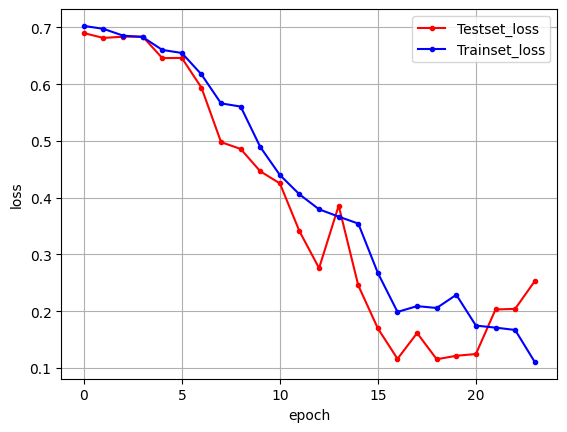

In [5]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 2. 전이 학습으로 모델 성능 극대화하기

### 실습: 전이 학습 실습하기

In [6]:
#from tensorflow.keras import Input, layers, metrics

from tensorflow.keras.applications import VGG16

# VGG16 모델 호출
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
transfer_model.trainable = False
transfer_model.summary()

finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [7]:
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

history = finetune_model.fit(
       train_generator,
       epochs=20,
       validation_data=test_generator,
       validation_steps=10,
       callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 69s 2s/step - loss: 0.7302 - accuracy: 0.5437 - val_loss: 0.6004 - val_accuracy: 0.7200
Epoch 2/20
32/32 [==============================] - 60s 2s/step - loss: 0.5095 - accuracy: 0.7688 - val_loss: 0.4588 - val_accuracy: 0.9200
Epoch 3/20
32/32 [==============================] - 60s 2s/step - loss: 0.4818 - accuracy: 0.7625 - val_loss: 0.4562 - val_accuracy: 0.8200
Epoch 4/20
32/32 [==============================] - 61s 2s/step - loss: 0.4763 - accuracy: 0.7625 - val_loss: 0.4426 - val_accuracy: 0.7800
Epoch 5/20
32/32 [==============================] - 60s 2s/step - loss: 0.3786 - accuracy: 0.8188 - val_loss: 0.4115 - val_accuracy: 0.8200
Epoch 6/20
32/32 [==============================] - 60s 2s/step - loss: 0.3405 - accuracy: 0.8687 - val_loss: 0.3040 - val_accuracy: 0.8400
Epoch 7/20
32/32 [==============================] - 60s 2s/step - loss: 0.3588 - accuracy: 0.8750 - val_loss: 0.2680 - val_accuracy: 0.9400
Epoch 8/20
32/32 [==

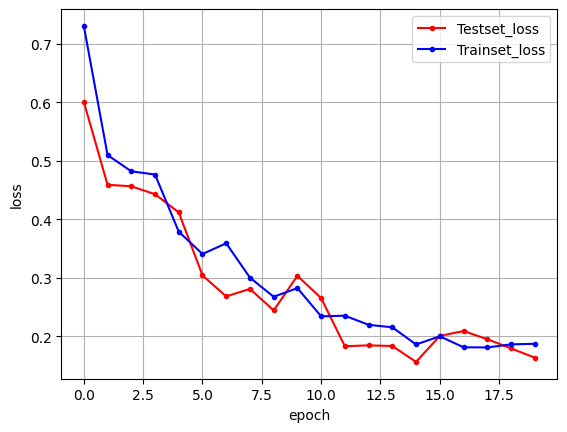

In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()